Pinnacle bank has asked yu to design a machine learning model that predict whethera particular loan given out would be profitable or not for the bank. The loan given out can be categorized into "good" and "bad" loan based on "loan status" whether the is "charged off" or "Fully Paid/Current", respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Importing the data file

In [2]:
df = pd.read_csv("D:\\finance_loan.csv")

In [3]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,02-11-2021,09-13-2021,04-13-2021,Charged Off,05-13-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,12-14-2021,01-15-2021,Fully Paid,02-15-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,01-05-2021,12-12-2021,01-09-2021,Charged Off,02-09-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,02-25-2021,12-12-2021,03-12-2021,Fully Paid,04-12-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,12-14-2021,01-15-2021,Fully Paid,02-15-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,07-17-2021,03-16-2021,08-12-2021,Fully Paid,09-12-2021,1294481,car,C3,36 months,Not Verified,28000.0,0.1260,275.96,0.1465,8000,11,8637
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,11-19-2021,06-14-2021,12-13-2021,Fully Paid,01-13-2022,1301833,car,C2,36 months,Verified,94800.0,0.2453,205.86,0.1427,6000,30,7218
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,06-11-2021,07-14-2021,07-14-2021,Fully Paid,08-14-2021,1291243,car,A4,36 months,Source Verified,59000.0,0.0665,172.10,0.0790,5500,23,6172
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,09-02-2021,06-15-2021,10-12-2021,Charged Off,11-12-2021,1299335,car,A5,36 months,Verified,116400.0,0.0394,762.08,0.0890,24000,31,8650
9,1064589,MI,INDIVIDUAL,10+ years,teltow contracting,B,MORTGAGE,02-09-2021,03-16-2021,03-16-2021,Fully Paid,04-16-2021,1298401,car,B5,60 months,Not Verified,36000.0,0.1773,93.21,0.1269,4125,21,5551


In [5]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

## Data Exploration

## Since the data does not have a proper column "loan_class" for good/bad loan, we will create one based off loan status

In [6]:
df1 = df.copy()

In [7]:
def classify_loan_status(status):
    if status == 'Charged Off':
        return "bad"
    elif status in ["Current","Fully Paid"]:
        return "good"
    else:
        return "unknown"

In [8]:
df1["loan_class"] = df1["loan_status"].apply(classify_loan_status)

In [9]:
# we wll drop loan_status column since we do not need it
df1 = df1.drop(columns = "loan_status", axis = 1)

In [10]:
df1.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,02-11-2021,09-13-2021,04-13-2021,05-13-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,bad
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,12-14-2021,01-15-2021,02-15-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,good
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,01-05-2021,12-12-2021,01-09-2021,02-09-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,bad
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,02-25-2021,12-12-2021,03-12-2021,04-12-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,good
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,12-14-2021,01-15-2021,02-15-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,good


### We see that the only column with data entries is "emp_title". We do not require this column, along with "id" and "address_state". We drop states because we want a model independent of state. Hence, we will drop these. We will also drop columns related to dates, which do not impact loan quality. We will keep loan issue date, since the month a loan is issued on may have some impact. We will verify this later.

**since this is only "INDIVIUAL" , we can drop this column**

**The classes are imbalanced and may impact model performance. We will keep this in mind when selecting model and metrics.**

In [11]:
# let's check the distribution of the classes in Loan class
loan_class_counts = df1['loan_class'].value_counts()
print(loan_class_counts)

loan_class
good    33243
bad      5333
Name: count, dtype: int64


In [12]:
# Since we only see "INDIVIDIUAL" in "application_status", elt's check if other class is present.
application_status_counts = df1['application_type'].value_counts()
print(application_status_counts)

application_type
INDIVIDUAL    38576
Name: count, dtype: int64


In [13]:
df1 = df1.drop(columns= ["application_type","id","address_state", "member_id", "emp_title","last_credit_pull_date","last_payment_date","next_payment_date"], axis  = 1)

In [14]:
#Let's check the dataframe after dropping the columns.
df1.head()

,emp_length,grade,home_ownership,issue_date,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class
0,< 1 year,C,RENT,02-11-2021,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,bad
1,9 years,E,RENT,01-01-2021,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,good
2,4 years,C,RENT,01-05-2021,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,bad
3,< 1 year,B,MORTGAGE,02-25-2021,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,good
4,10+ years,A,MORTGAGE,01-01-2021,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,good


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_length           38576 non-null  object 
 1   grade                38576 non-null  object 
 2   home_ownership       38576 non-null  object 
 3   issue_date           38576 non-null  object 
 4   purpose              38576 non-null  object 
 5   sub_grade            38576 non-null  object 
 6   term                 38576 non-null  object 
 7   verification_status  38576 non-null  object 
 8   annual_income        38576 non-null  float64
 9   dti                  38576 non-null  float64
 10  installment          38576 non-null  float64
 11  int_rate             38576 non-null  float64
 12  loan_amount          38576 non-null  int64  
 13  total_acc            38576 non-null  int64  
 14  total_payment        38576 non-null  int64  
 15  loan_class           38576 non-null 

In [16]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


## Check for missing data and outliers

In [17]:
# Let us check again for missing values to be sure.
# Create a boolean column with missing data entry
mask = df1.isna().any(axis = 1)

#output df where mask == True or missing data entry
df1[mask]

,emp_length,grade,home_ownership,issue_date,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class


### Let us check for duplicates

In [18]:
# mask for rows that are duplicates
duplicate  = df1.duplicated()

# printing out the duplicates
df1[duplicate]

,emp_length,grade,home_ownership,issue_date,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class


#### The dataframe does not have duplicates.

### Let us visualize the outliers

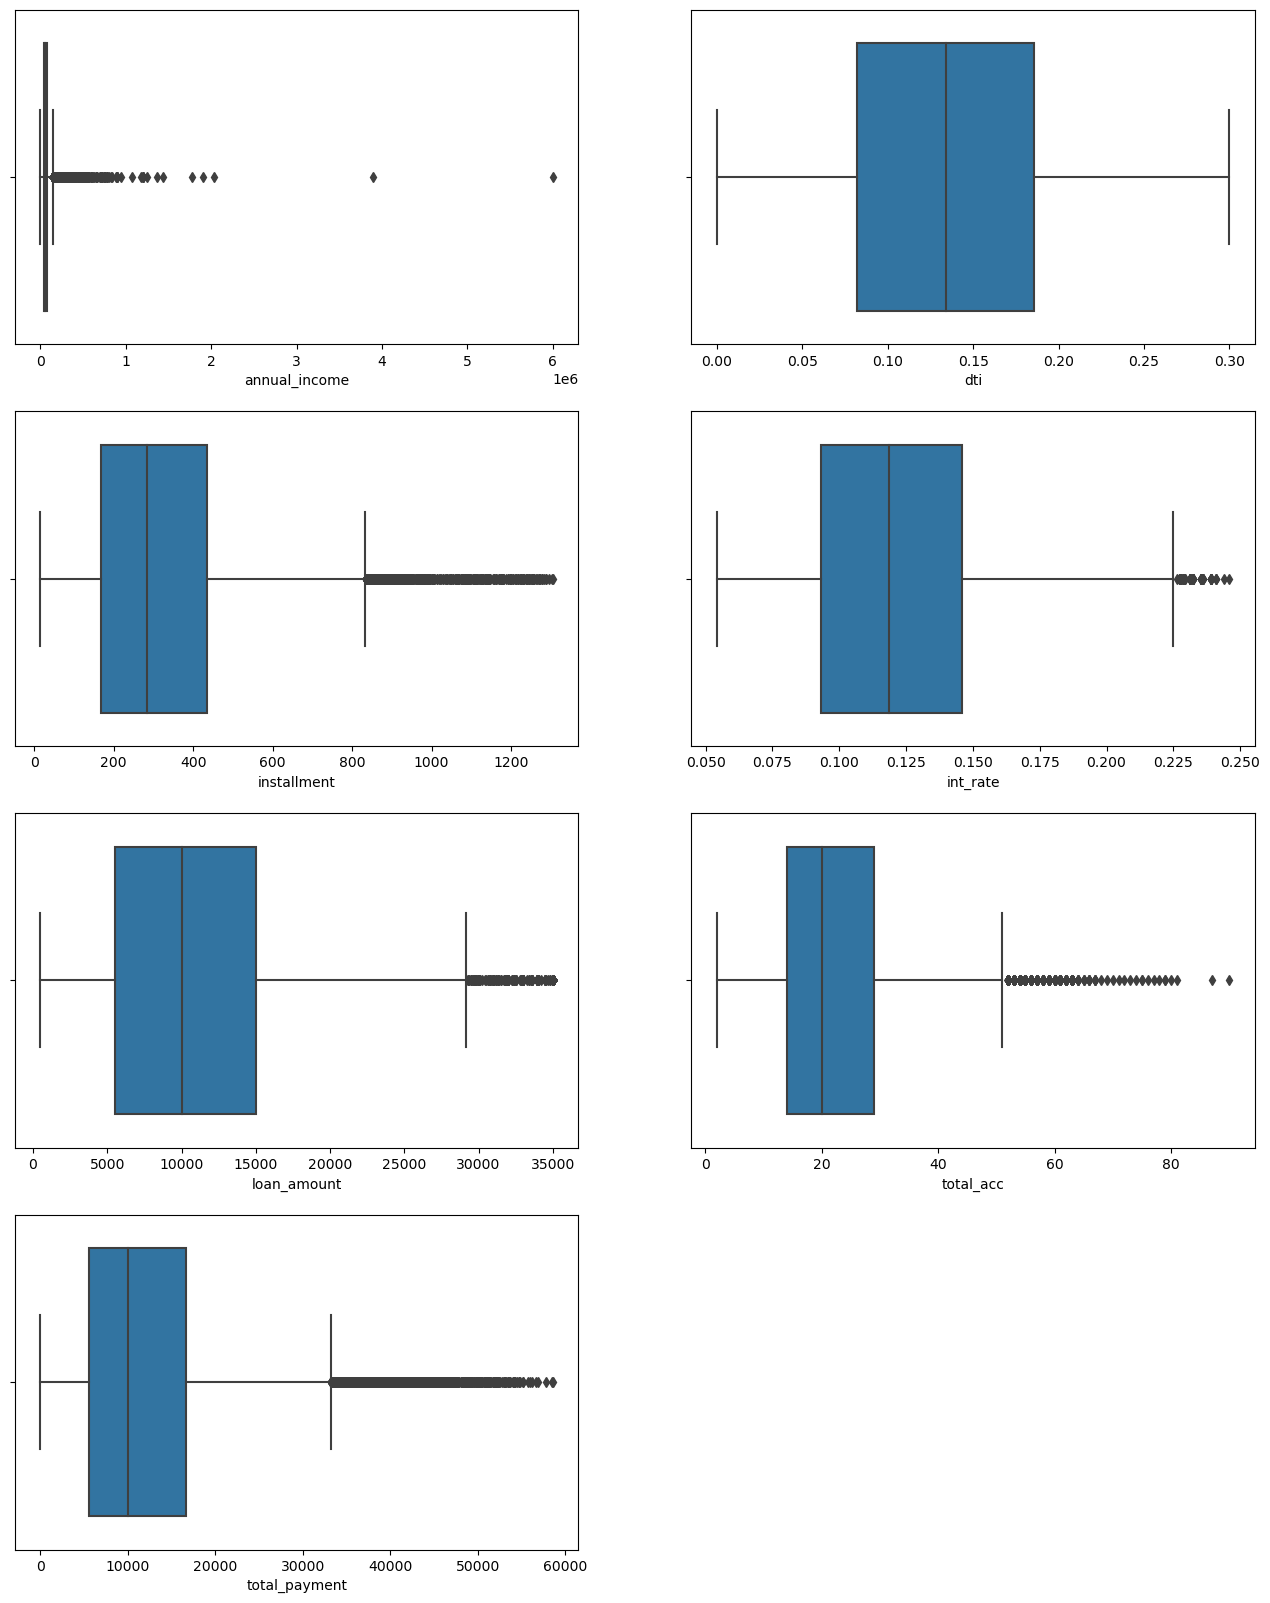

In [19]:
fig,axes = plt.subplots(4,2,figsize = (16,20))
axes = axes.flatten()
sns.boxplot(ax = axes[0], x = df1['annual_income'])
sns.boxplot(ax = axes[1], x = df1['dti'])
sns.boxplot(ax = axes[2], x = df1['installment'])
sns.boxplot(ax = axes[3], x = df1['int_rate'])
sns.boxplot(ax = axes[4], x = df1['loan_amount'])
sns.boxplot(ax = axes[5], x = df1['total_acc'])
sns.boxplot(ax = axes[6], x = df1['total_payment'])

axes[7].set_visible(False)

In [20]:
from scipy import stats


Althought there are several outliers in each of these features, the values of these outliers are perfectly reasonable and expected given the context of the problem. These extreme values can represent borrowers with large loans, high-risk loans, or borrowers with very high incomes, which are all expected scenarios in financial datasets. 

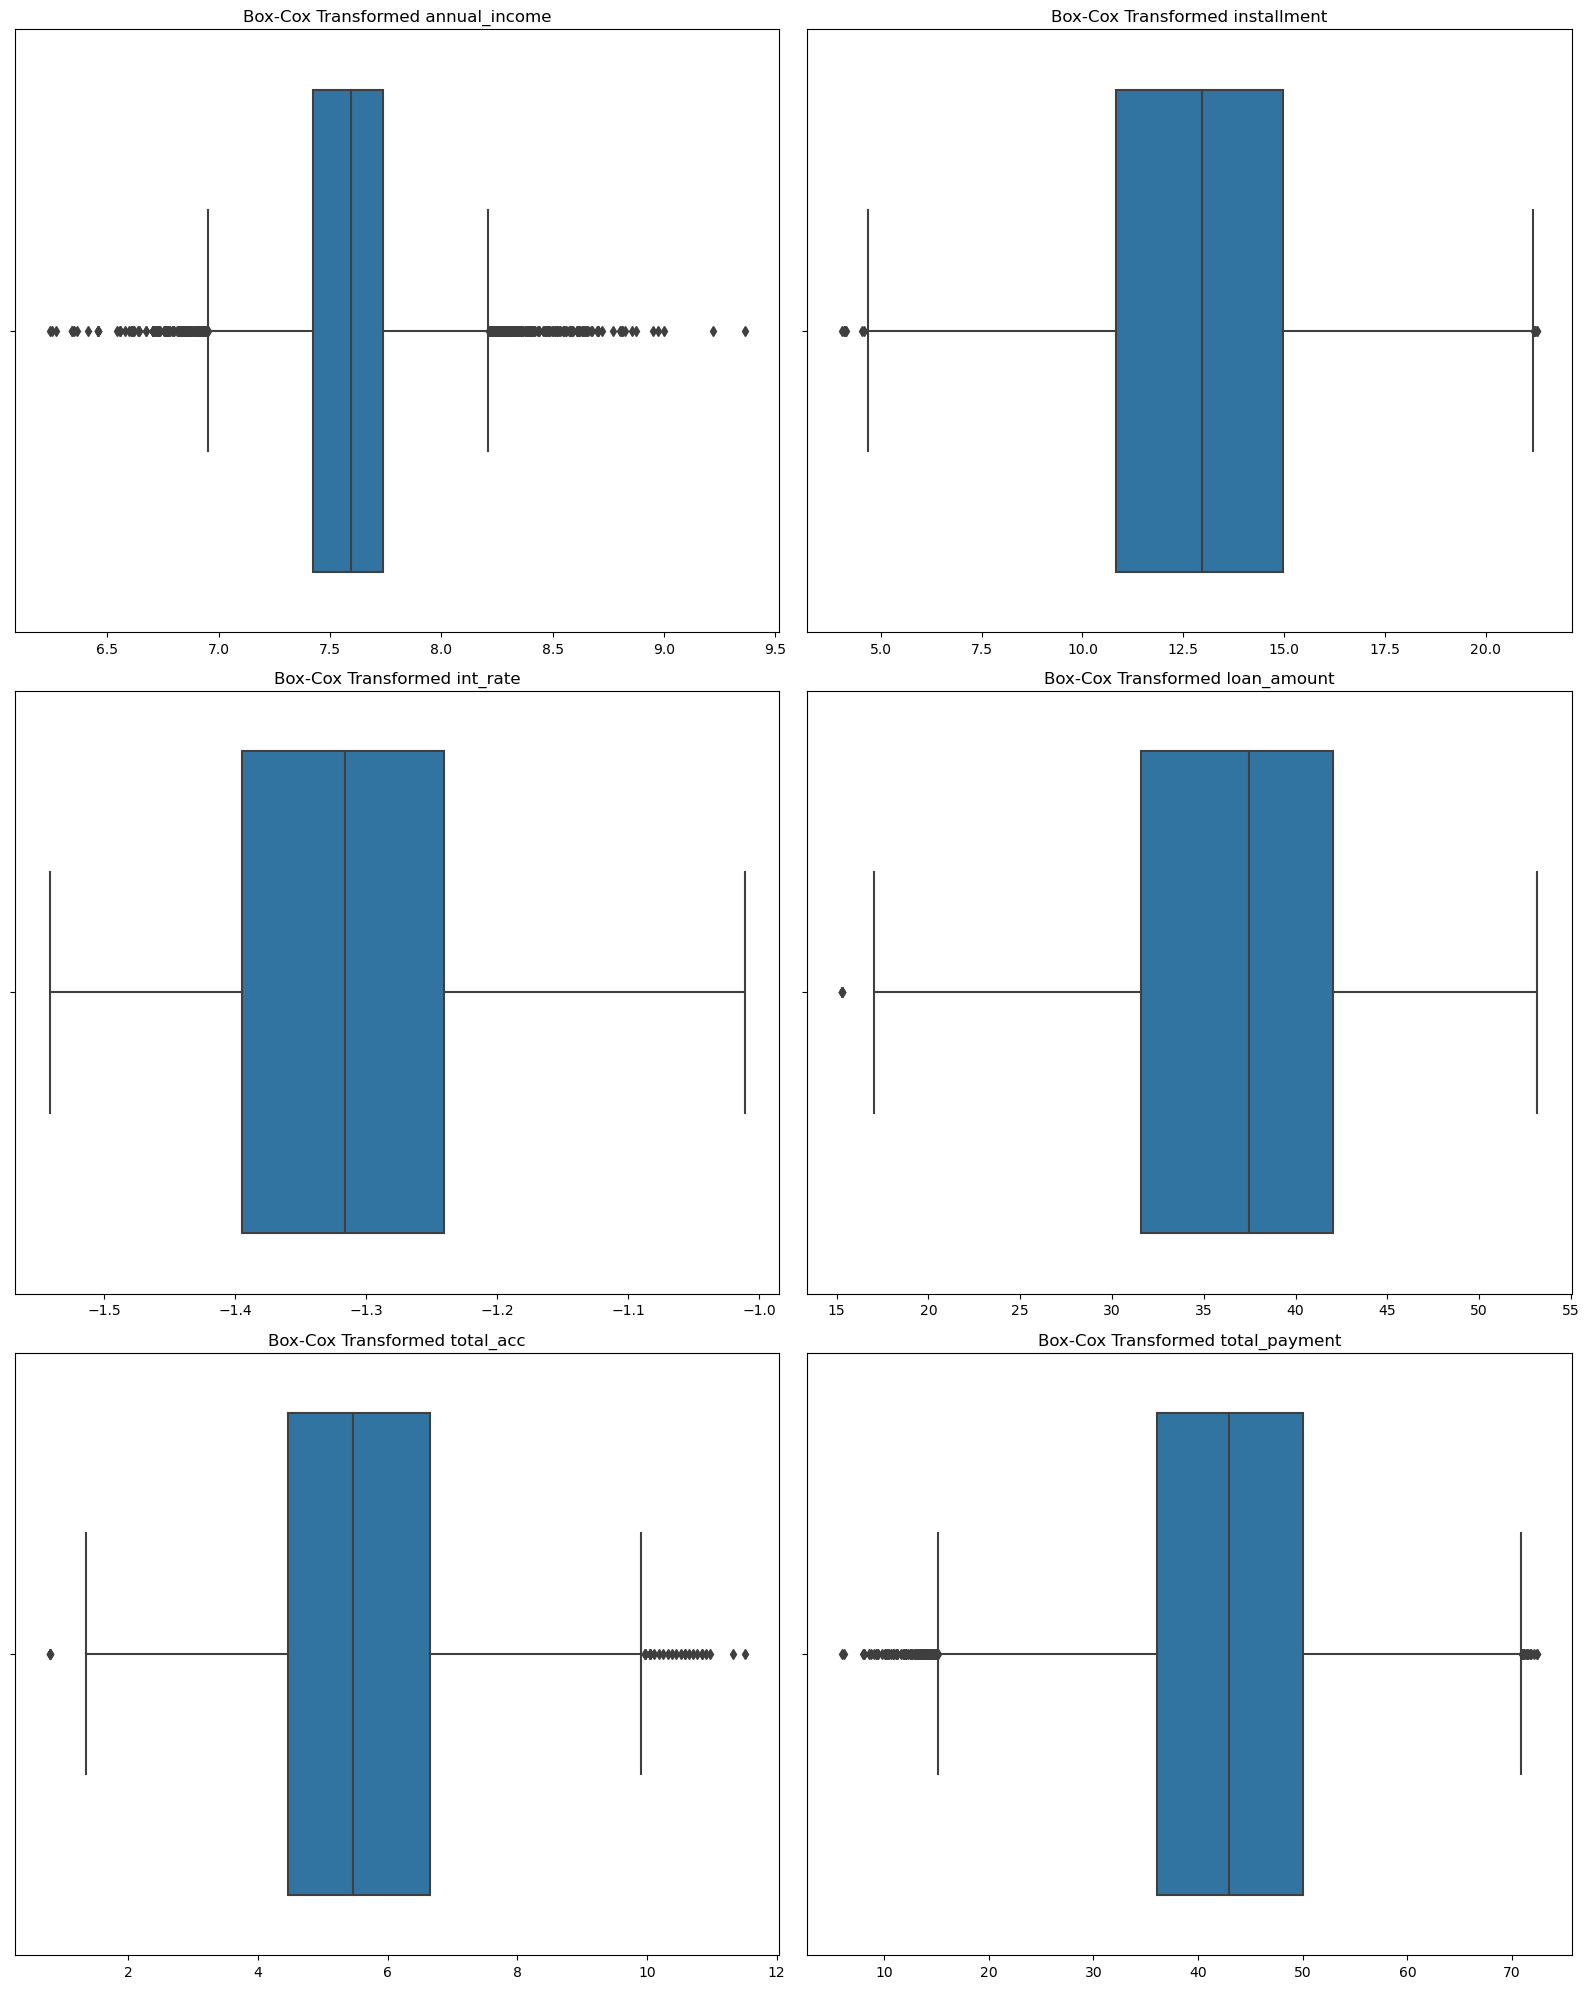

In [21]:
# Assuming df1 is your DataFrame
fig, axes = plt.subplots(3, 2, figsize=(16, 20))
axes = axes.flatten()

# List of columns to transform
columns = ['annual_income', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']

# Apply Box-Cox transformation to each column and plot
for i, column in enumerate(columns):
    if any(df1[column] <= 0):
        # For columns with non-positive values, add a constant to make them positive
        transformed_data, _ = stats.boxcox(df1[column] - df1[column].min() + 1)
    else:
        transformed_data, _ = stats.boxcox(df1[column])
    
    sns.boxplot(ax=axes[i], x=transformed_data)
    axes[i].set_title(f'Box-Cox Transformed {column}')

# Adjust layout
plt.tight_layout()
plt.show()

## This leads to a transformed features with a more normal distribution. So, we will transform the data columns using boxcox to avoid skewing of the data to impact the model performance

In [22]:
# Assuming df1 is your DataFrame
df2 = df1.copy()
# List of columns to transform
columns = ['annual_income', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']

# Apply Box-Cox transformation to each column and update the DataFrame
for column in columns:
    if any(df1[column] <= 0):
        # For columns with non-positive values, add a constant to make them positive
        transformed_data, _ = stats.boxcox(df1[column] - df1[column].min() + 1)
        df2[column] = transformed_data
    else:
        transformed_data, _ = stats.boxcox(df1[column])
        df1[column] = transformed_data

# Verify the transformation by displaying the first few rows of the DataFrame
df2.head()

,emp_length,grade,home_ownership,issue_date,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class
0,< 1 year,C,RENT,02-11-2021,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,bad
1,9 years,E,RENT,01-01-2021,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,good
2,4 years,C,RENT,01-05-2021,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,bad
3,< 1 year,B,MORTGAGE,02-25-2021,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,good
4,10+ years,A,MORTGAGE,01-01-2021,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,good


In [23]:
# Convert "issue_date" to datetime format
df2['issue_date'] = pd.to_datetime(df2['issue_date'])

# Extract the month and create a new column "issue_month"
df2['issue_month'] = df2['issue_date'].dt.month

# We want to remove the original "issue_date" column
df2.drop('issue_date', axis=1, inplace=True)

# Verify the transformation by displaying the first few rows of the DataFrame
df2.head()

,emp_length,grade,home_ownership,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class,issue_month
0,< 1 year,C,RENT,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,bad,2
1,9 years,E,RENT,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,good,1
2,4 years,C,RENT,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,bad,1
3,< 1 year,B,MORTGAGE,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,good,2
4,10+ years,A,MORTGAGE,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,good,1


### A lot of these are categorical features. Let us correlation of continuous variable features the "Loan Status".

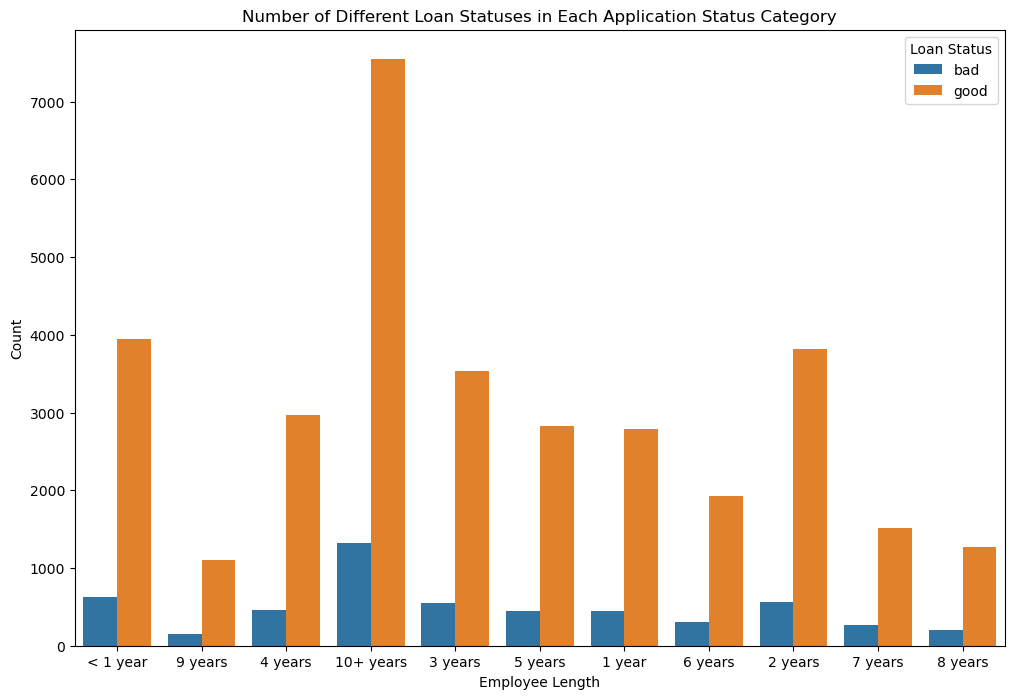

In [24]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='emp_length', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Employee Length')
plt.ylabel('Count')
plt.legend(title='Loan Status')

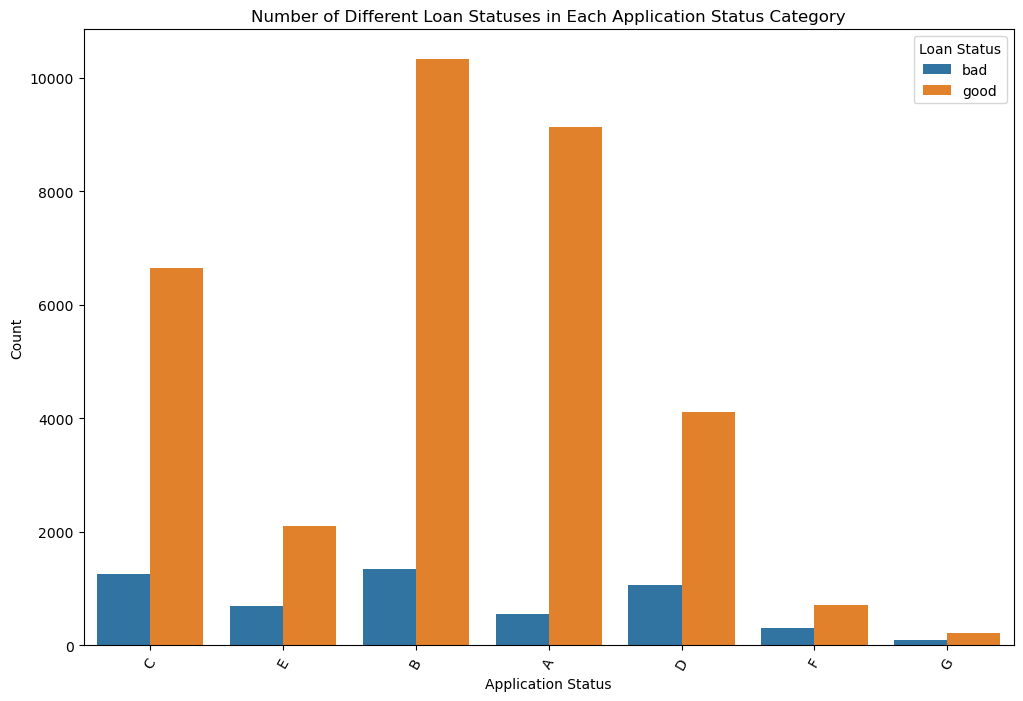

In [25]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='grade', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation = 60);

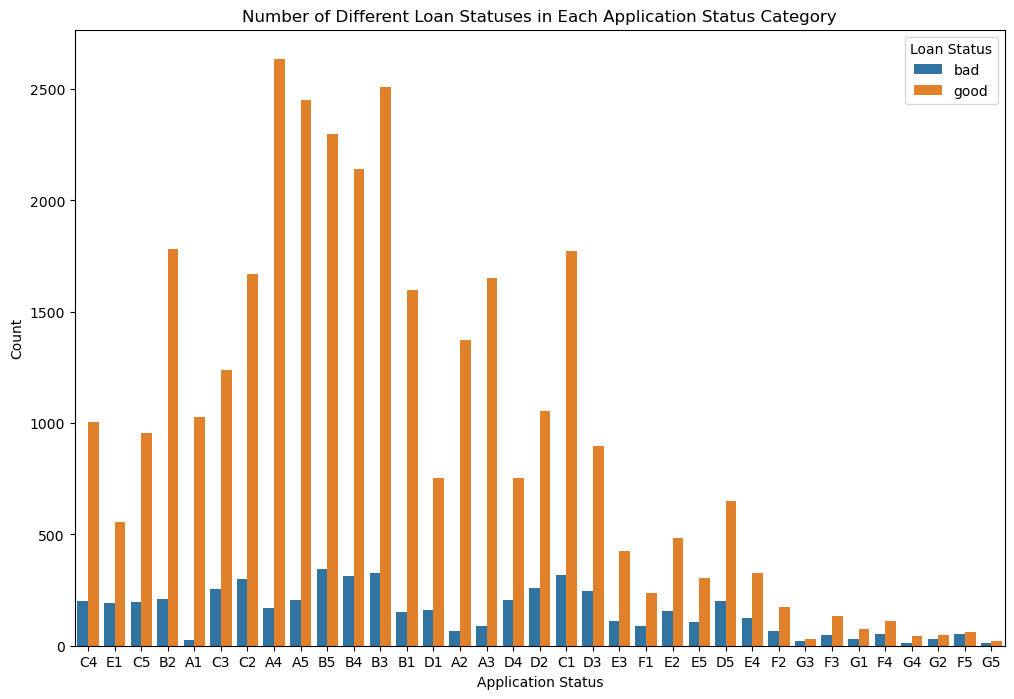

In [26]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='sub_grade', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')

Dropping the subgrades column from the dataset can significantly reduce the complexity and high cardinality associated with the numerous subcategories, thus simplifying the data analysis process. This reduction in complexity helps prevent overfitting and enhances the interpretability of the models by focusing on the broader grades categories, which already capture the essential risk segmentation. Additionally, it improves computational efficiency by lowering the dimensionality, leading to faster training times and more robust models.

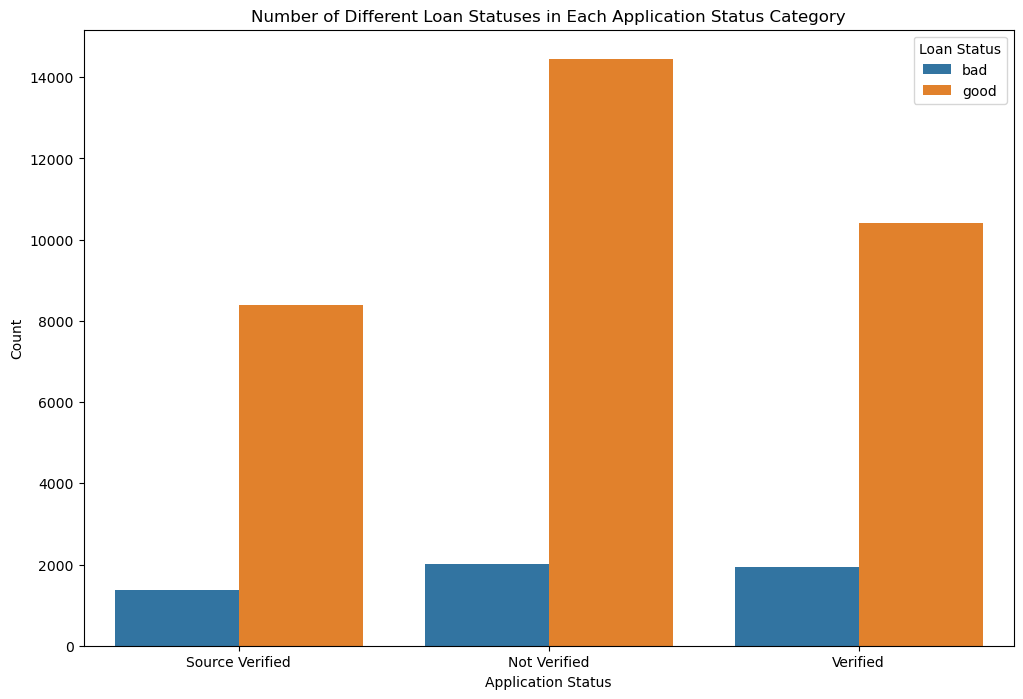

In [27]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='verification_status', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')

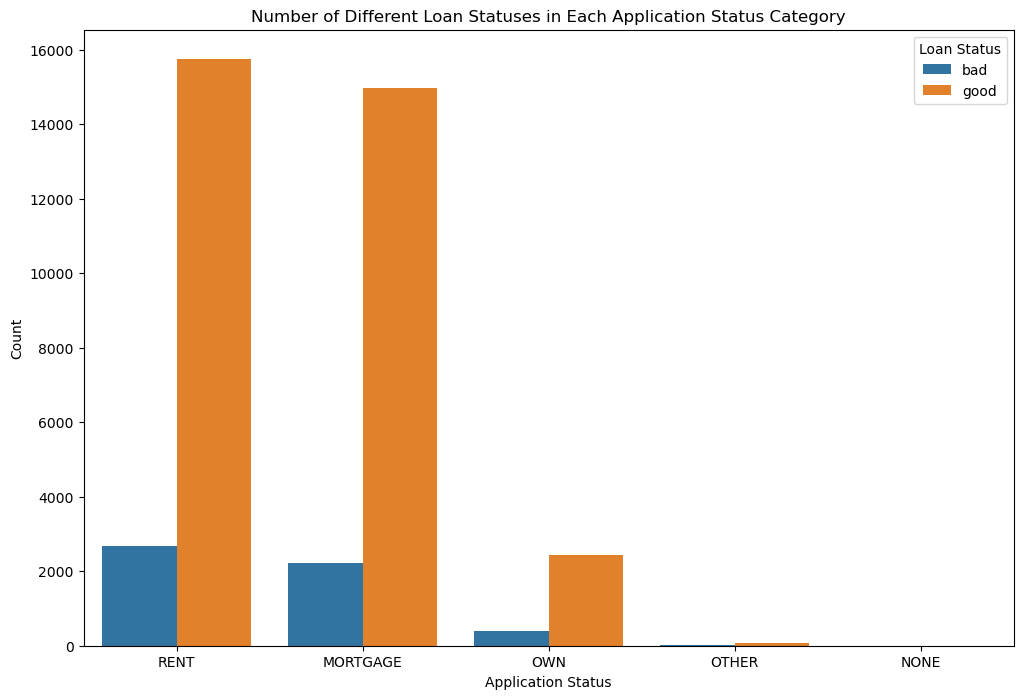

In [28]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='home_ownership', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')

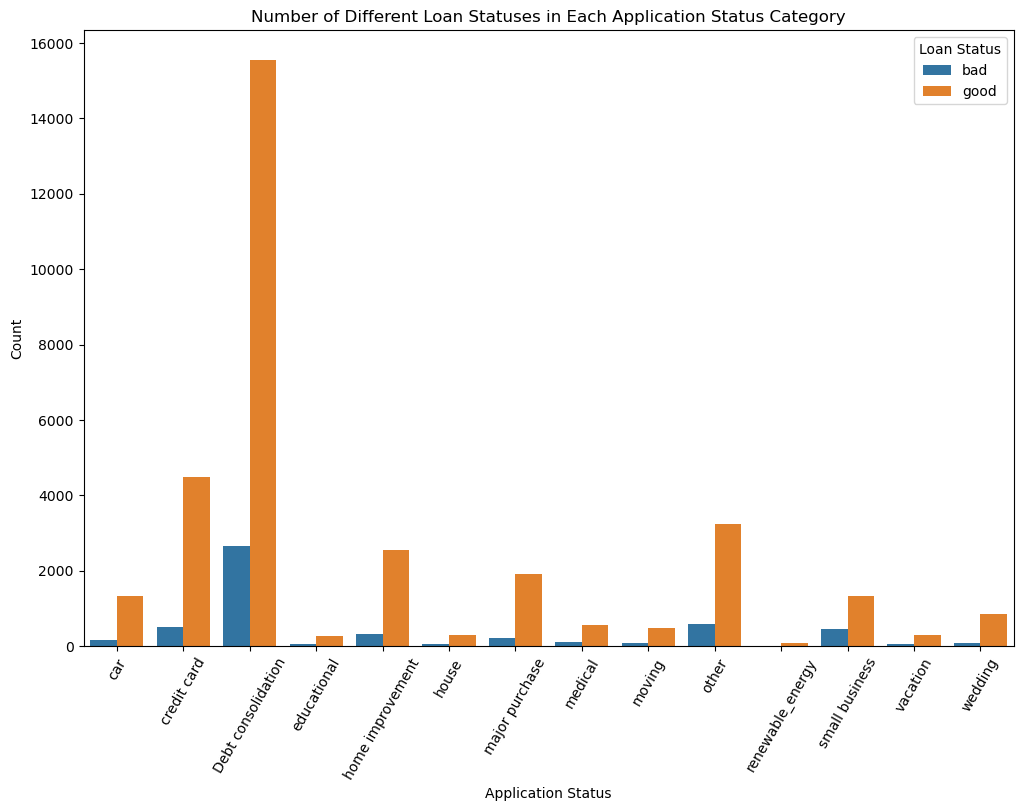

In [29]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='purpose', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation = 60);

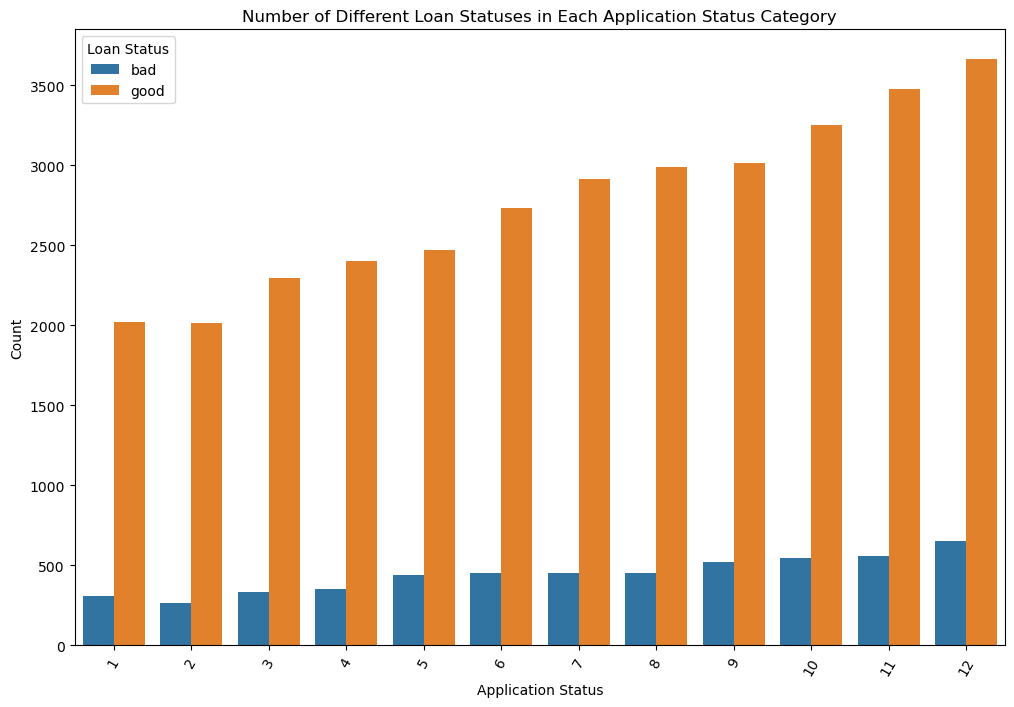

In [30]:
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=df2, x='issue_month', hue='loan_class')

# Set the title and labels
plt.title('Number of Different Loan Statuses in Each Application Status Category')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation = 60);

Dropping the "sub_grades" column from the dataset can significantly reduce the complexity and high cardinality associated with the numerous subcategories, thus simplifying the data analysis process. This reduction in complexity helps prevent overfitting and enhances the interpretability of the models by focusing on the broader grades categories, which already capture the essential risk segmentation. Additionally, it improves computational efficiency by lowering the dimensionality, leading to faster training times and more robust models.

In [31]:
df2 = df2.drop(columns= [ 'sub_grade'],axis = 1)

In [32]:
df2.head()

,emp_length,grade,home_ownership,purpose,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_class,issue_month
0,< 1 year,C,RENT,car,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,bad,2
1,9 years,E,RENT,car,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,good,1
2,4 years,C,RENT,car,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,bad,1
3,< 1 year,B,MORTGAGE,car,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,good,2
4,10+ years,A,MORTGAGE,car,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,good,1


## Modelling Logistic Regression

In [33]:
from statsmodels.formula.api import logit
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [81]:
df2_encoded = pd.get_dummies(df2, drop_first= True, dtype= int)
df2_encoded.head()

,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_month,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit card,purpose_educational,purpose_home improvement,purpose_house,purpose_major purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,loan_class_good
0,30000.0,0.0100,59.83,0.1527,2500,4,1009,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,48000.0,0.0535,109.43,0.1864,3000,4,3939,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,50000.0,0.2088,421.65,0.1596,12000,11,3522,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42000.0,0.0540,97.06,0.1065,4500,9,4911,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
4,83000.0,0.0231,106.53,0.0603,3500,28,3835,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [82]:
df2_encoded.rename(columns= {'emp_length_10+ years':"emp_length_over10years","emp_length_< 1 year":"emp_length_less1year"  },inplace=True)
df2_encoded.columns = df2_encoded.columns.str.replace(' ', '')


In [83]:
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   annual_income                       38576 non-null  float64
 1   dti                                 38576 non-null  float64
 2   installment                         38576 non-null  float64
 3   int_rate                            38576 non-null  float64
 4   loan_amount                         38576 non-null  int64  
 5   total_acc                           38576 non-null  int64  
 6   total_payment                       38576 non-null  int64  
 7   issue_month                         38576 non-null  int32  
 8   emp_length_over10years              38576 non-null  int32  
 9   emp_length_2years                   38576 non-null  int32  
 10  emp_length_3years                   38576 non-null  int32  
 11  emp_length_4years                   38576

In [84]:
#Split data into train test sets
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, make_scorer, ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBClassifier


In [85]:
X = df2_encoded.drop(columns = ['loan_class_good'])
y = df2_encoded['loan_class_good']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [87]:
# Create a pipeline that includes the scaler and logistic regression
pipeline = Pipeline([('scaler', StandardScaler()),('logistic_regression', LogisticRegression())])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [88]:
y_pred = pipeline.predict(X_test)

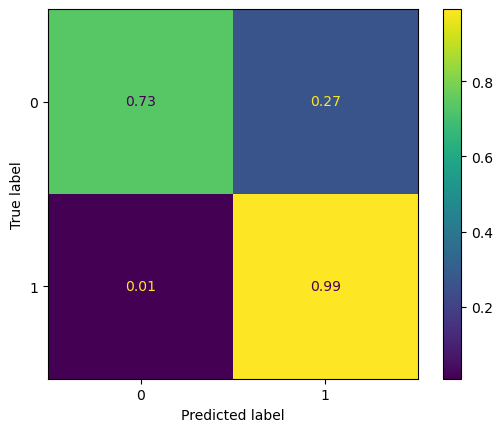

In [89]:
# Generate array of values for confusion matrix
logistic_regression = pipeline.named_steps['logistic_regression']
c_matrix =  confusion_matrix(y_test,y_pred, labels = logistic_regression.classes_,normalize='true')
# Plot confusion matrix
c_plot = ConfusionMatrixDisplay(c_matrix)
c_plot.plot(values_format='.2f')


In [90]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [91]:
logistic_test_scores = get_test_scores('Logistic Regression',y_pred, y_test)
print(logistic_test_scores)

                 model  precision    recall        F1  accuracy
0  Logistic Regression      0.959  0.991581  0.975018  0.956195


In [92]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state= 42)
# 2. Create a dictionary of hyperparameters to tune 
cv_params = {"max_depth":[2,3,5], "max_features":[1,2,3],
             "max_samples":[0.1,0.5,0.7],
             'min_samples_leaf':[1,2],
             'min_samples_split':[2],
             'n_estimators':[50,100,200]}

# 3. Define a dictionary of scoring metrics to capture
# Define the scoring dictionary with custom scorers including zero_division parameter for precision
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, cv=4, scoring=scoring, refit = 'f1')

In [93]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5], 'max_features': [1, 2, 3],
                         'max_samples': [0.1, 0.5, 0.7],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': make_scorer(precision_score, zero_division=1),
                      'recall': 'recall'})

In [94]:
#Examine best scores
rf1.best_score_

0.9256931984456225

In [95]:
rf1.best_params_

{'max_depth': 2,
 'max_features': 1,
 'max_samples': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [96]:
rf_pred = rf1.best_estimator_.predict(X_test)

In [97]:
rf_test_scores = get_test_scores("RF CV", rf_pred, y_test)

### The performance is lower compared to logistic regression
Let us now try  classifier alogithm Xgboost

In [98]:
# 1. Instantiate the XGBoost classifier
xgb =  XGBClassifier(objective='binary:logistic', random_state = 42)
# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate':[0.1,0.2],
             'max_depth':[5,10,15],
             'n_estimators':[100, 200, 300],
             'min_child_weight':[1,2,3]
}
# 3. Define a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': 'recall',
    'f1': 'f1'
}
# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb,cv_params,scoring=scoring, refit='f1', verbose = 1, n_jobs=-1)

In [99]:
xgb1.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 10, 15],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': make_scorer(precision_score, zero_division=1),
                      'recall': 'recall'},
             verbose=1)

In [100]:
# Examine best score
xgb1.best_score_

0.9850460654138544

In [101]:
# Get scores on test data
XGB_model = xgb1.best_estimator_
xgb_pred = XGB_model.predict(X_test)

In [102]:
xgb_test_scores = get_test_scores('XGB test',xgb_pred, y_test)
results = pd.concat([logistic_test_scores,rf_test_scores, xgb_test_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.959000,0.991581,0.975018,0.956195
0,RF CV,0.862105,1.000000,0.925947,0.862105
0,XGB test,0.976730,0.996993,0.986758,0.976931


## Based on comparing the perfomance metrics, F1 and accuracy, XGboost performs the best for this model.

Let us plot feature importance based on XGBoost

In [103]:
importances = XGB_model.feature_importances_
feature_names = X.columns.tolist()

In [104]:
importances

array([0.01280574, 0.0120708 , 0.1176409 , 0.02686514, 0.20429035,
       0.01248097, 0.14122225, 0.01240129, 0.01470868, 0.0083385 ,
       0.00884722, 0.01411834, 0.01109107, 0.0076043 , 0.0138085 ,
       0.        , 0.00466809, 0.01127809, 0.01458208, 0.01251897,
       0.01334228, 0.01220169, 0.00867657, 0.01250614, 0.        ,
       0.        , 0.00757711, 0.00958846, 0.01417421, 0.01398618,
       0.01319926, 0.01110156, 0.00862424, 0.01276338, 0.00632431,
       0.        , 0.0112511 , 0.        , 0.01566681, 0.01067905,
       0.00850151, 0.12443101, 0.01292694, 0.0111369 ], dtype=float32)

In [105]:
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})



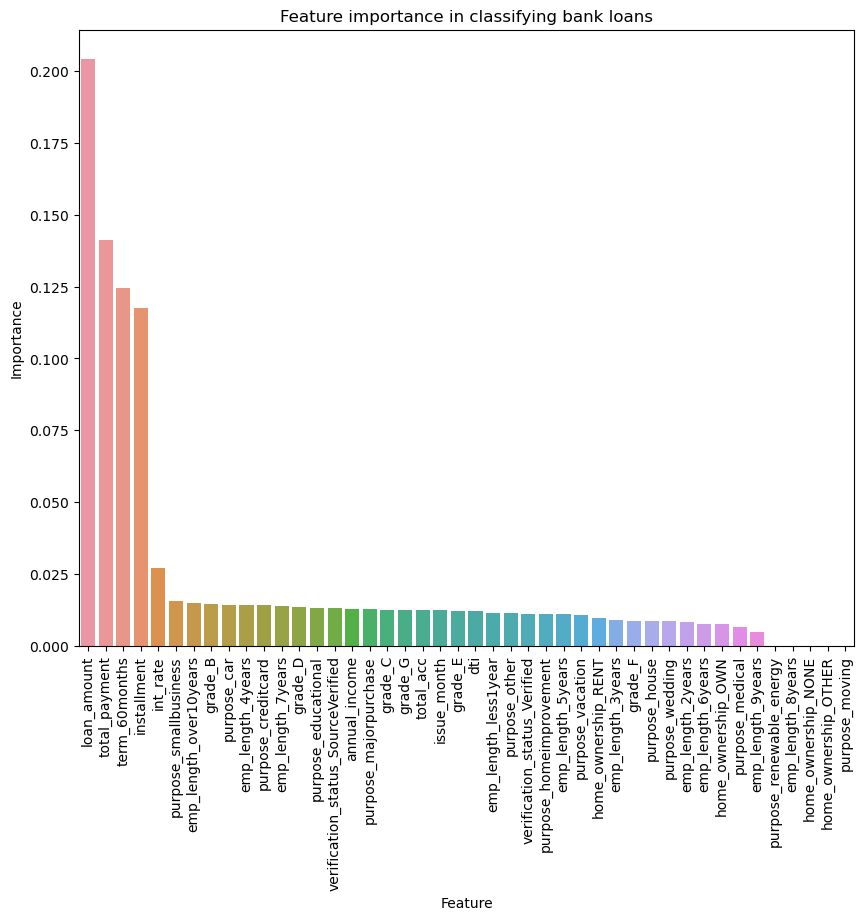

In [106]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(y = 'Importance', x = 'Feature', data = feature_df.sort_values(by = 'Importance', ascending= False), ax= ax)
plt.title('Feature importance in classifying bank loans')
plt.xticks(rotation = 90);

We see that term duration and loan amound are the top two deciding factors in whether a loan will turn out to be positive or negative

#### XGBoost performs really well on the test data. Using this, we can predict whether a loan is likely to turn out as good or bad in the future. The three most important features are loan amount, total payment and term duration.